In [353]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

In [354]:
df = pd.read_csv('mock_kaggle.csv')
df = df.rename(columns={'data': 'date','venda': 'sold', 'estoque': 'stock', 'preco': 'price'})

In [355]:
df

,date,sold,stock,price
0,2014-01-01,0,4972,1.29
1,2014-01-02,70,4902,1.29
2,2014-01-03,59,4843,1.29
3,2014-01-04,93,4750,1.29
4,2014-01-05,96,4654,1.29
...,...,...,...,...
932,2016-07-27,98,3179,2.39
933,2016-07-28,108,3071,2.39
934,2016-07-29,128,4095,2.39
935,2016-07-30,270,3825,2.39


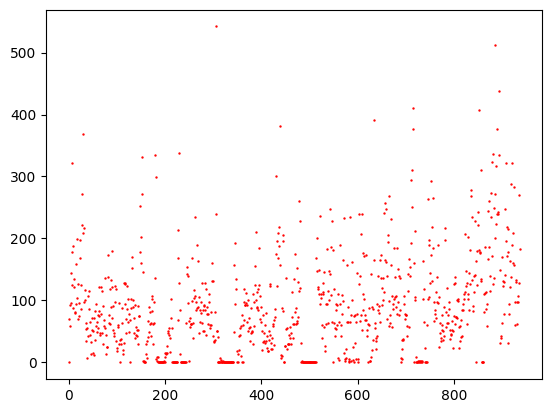

In [356]:
# df.sold.plot()

x_sold = df.index
y_sold = df.sold

plt.scatter(x_sold, y_sold, s=0.5, color='red')

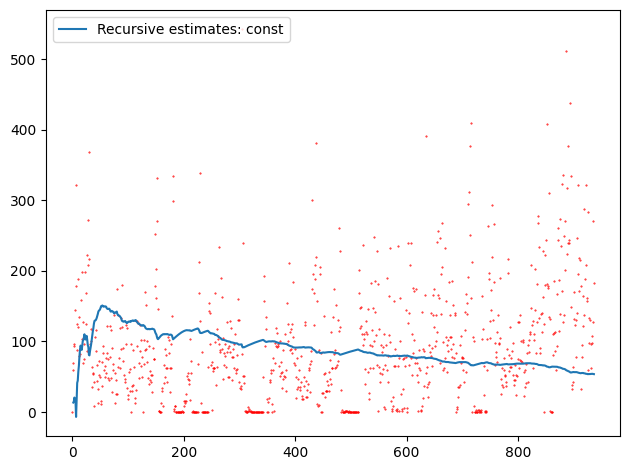

In [357]:
endog_sold = y_sold
exog_sold = sm.add_constant(x_sold)

model_sold = sm.RecursiveLS(endog_sold, exog_sold)
res_sold = model_sold.fit()

res_sold.plot_recursive_coefficient(alpha=None)
plt.scatter(x_sold, y_sold, s=0.2, color='red')

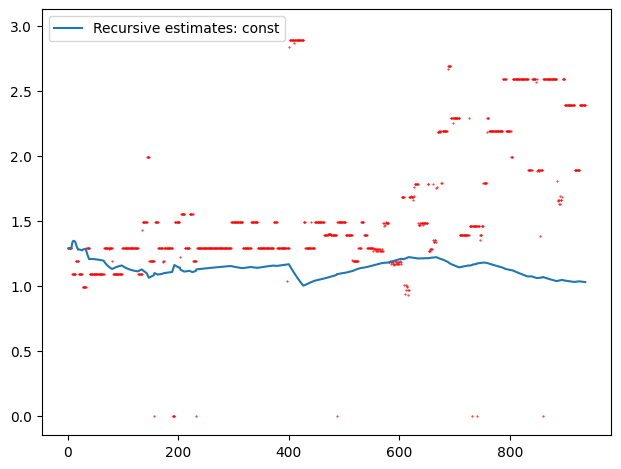

In [358]:
x_price = df.index
y_price = df.price

endog_price = y_price
exog_price = sm.add_constant(x_price)

model_price = sm.RecursiveLS(endog_price, exog_price)
res_price = model_price.fit()

res_price.plot_recursive_coefficient(alpha=None)
plt.scatter(x_price, y_price, s=0.2, color='red')


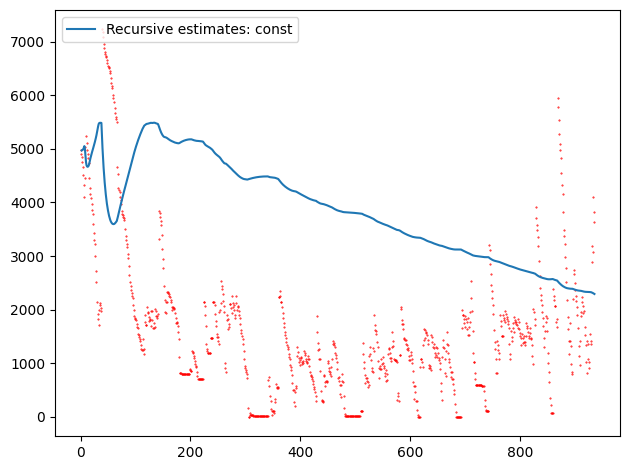

In [359]:
x_stock = df.index
y_stock = df.stock

endog_stock = y_stock
exog_stock = sm.add_constant(x_stock)

model_stock = sm.RecursiveLS(endog_stock, exog_stock)
res_stock = model_stock.fit()

res_stock.plot_recursive_coefficient(alpha=None)
plt.scatter(x_stock, y_stock, s=0.2, color='red')


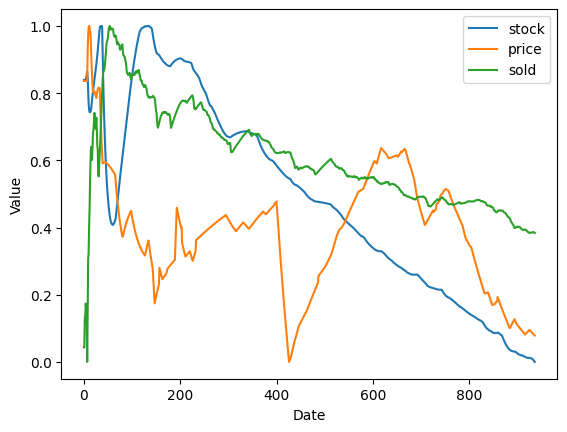

In [360]:
from statsmodels.graphics.factorplots import interaction_plot


res_stock_coefs = res_stock.recursive_coefficients.filtered[0]
res_price_coefs = res_price.recursive_coefficients.filtered[0]
res_sold_coefs = res_sold.recursive_coefficients.filtered[0]


res_stock_coefs_scaled = np.interp(res_stock_coefs, (res_stock_coefs.min(), res_stock_coefs.max()), (0, 1))
res_price_coefs_scaled = np.interp(res_price_coefs, (res_price_coefs.min(), res_price_coefs.max()), (0, 1))
res_sold_coefs_scaled = np.interp(res_sold_coefs, (res_sold_coefs.min(), res_sold_coefs.max()), (0, 1))


plt.plot(res_stock_coefs_scaled, label='stock')
plt.plot(res_price_coefs_scaled, label='price')
plt.plot(res_sold_coefs_scaled, label='sold')
plt.legend()


plt.xlabel("Date")
plt.ylabel("Value")


plt.show()

In [361]:
import matplotlib.pyplot as plt
import matplotlib.axes
import matplotlib.figure
import numpy as np

from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms


def confidence_ellipse(x, y, ax: matplotlib.axes.Axes, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)


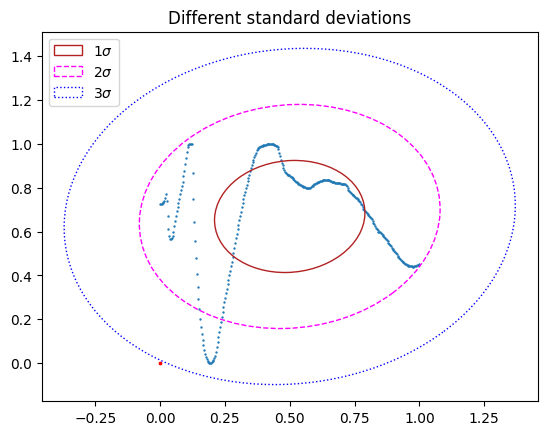

In [362]:
x = df.index[:int(1/3*len(df.index))]
y = res_stock_coefs_scaled[:int(1/3*len(df.index))]

x = np.interp(x, (x.min(), x.max()), (0, 1))
y = np.interp(y, (y.min(), y.max()), (0, 1))


mu = 0, 0
fig, ax_nstd = plt.subplots()
ax_nstd.scatter(x, y, s=0.5)




confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')


ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()

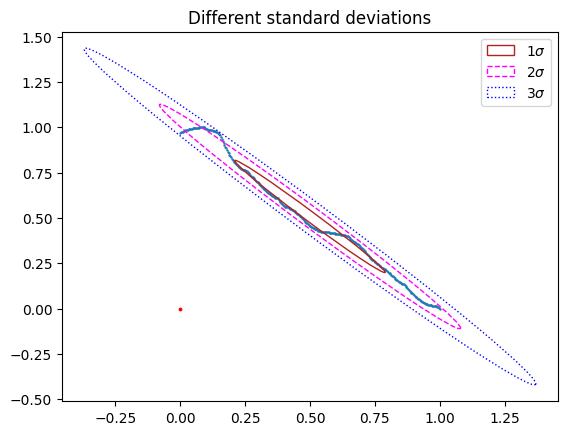

In [363]:
x = df.index[int(1/3*len(df.index)):int(2/3*len(df.index))]
y = res_stock_coefs_scaled[int(1/3*len(df.index)):int(2/3*len(df.index))]

x = np.interp(x, (x.min(), x.max()), (0, 1))
y = np.interp(y, (y.min(), y.max()), (0, 1))


mu = 0, 0
fig, ax_nstd = plt.subplots()
ax_nstd.scatter(x, y, s=0.5)




confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')


ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()

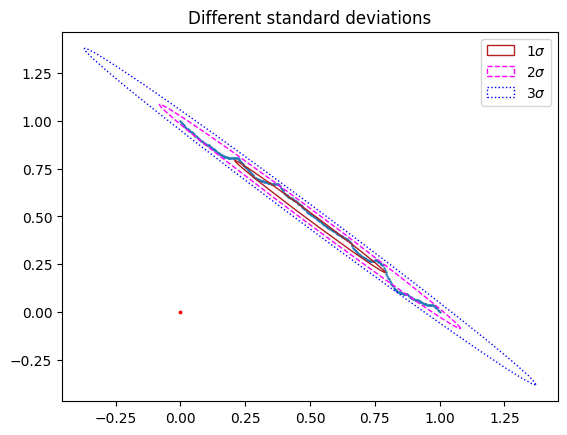

In [364]:
x = df.index[int(2/3*len(df.index)):]
y = res_stock_coefs_scaled[int(2/3*len(df.index)):]

x = np.interp(x, (x.min(), x.max()), (0, 1))
y = np.interp(y, (y.min(), y.max()), (0, 1))


mu = 0, 0
fig, ax_nstd = plt.subplots()
ax_nstd.scatter(x, y, s=0.5)




confidence_ellipse(x, y, ax_nstd, n_std=1,
                   label=r'$1\sigma$', edgecolor='firebrick')
confidence_ellipse(x, y, ax_nstd, n_std=2,
                   label=r'$2\sigma$', edgecolor='fuchsia', linestyle='--')
confidence_ellipse(x, y, ax_nstd, n_std=3,
                   label=r'$3\sigma$', edgecolor='blue', linestyle=':')


ax_nstd.scatter(mu[0], mu[1], c='red', s=3)
ax_nstd.set_title('Different standard deviations')
ax_nstd.legend()
plt.show()